In [2]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import linregress
from numpy import loadtxt
from scipy import linalg

In [3]:
data = np.loadtxt("dax_data.txt", comments="#", delimiter="\n")

def create_polynomial_data_matrix(polynomial):
    data_matrix = np.empty((0,(polynomial)),dtype=np.float64)
    i=0
    while i<len(data):
        j=0
        temp_pol = polynomial
        coeffecients = np.empty(0,dtype=float)
        while j<temp_pol:
            coeffecients = np.append(coeffecients,np.array([float((i)**(j))]))
            j += 1
        coeffecients = np.sort(coeffecients)[::-1]
        data_matrix = np.append(data_matrix,[np.array(coeffecients)],axis=0)
        i += 1
        
    return data_matrix

In [4]:
AP3 = create_polynomial_data_matrix(10)
AP2 = create_polynomial_data_matrix(5)
AP1 = create_polynomial_data_matrix(1)

AP3T = AP3.transpose()
AP2T = AP2.transpose()
AP1T = AP1.transpose()


AP3T_dot_AP3 = np.dot(AP3T,AP3)
AP2T_dot_AP2 = np.dot(AP2T,AP2)
AP1T_dot_AP1 = np.dot(AP1T,AP1)


# det_AP3T_dot_AP3 = np.linalg.det(AP3T_dot_AP3)

inv_AP3T_dot_AP3 = np.linalg.inv(AP3T_dot_AP3)
inv_AP2T_dot_AP2 = np.linalg.inv(AP2T_dot_AP2)
inv_AP1T_dot_AP1 = np.linalg.inv(AP1T_dot_AP1)
# print(AP3T_dot_AP3.shape)
# # print(np.dot(AP3T,z3).shape)

xp3 = np.dot(inv_AP3T_dot_AP3,np.dot(AP3T,data))
xp2 = np.dot(inv_AP2T_dot_AP2,np.dot(AP2T,data))
xp1 = np.dot(inv_AP1T_dot_AP1,np.dot(AP1T,data))
# print(AP3[::-1])

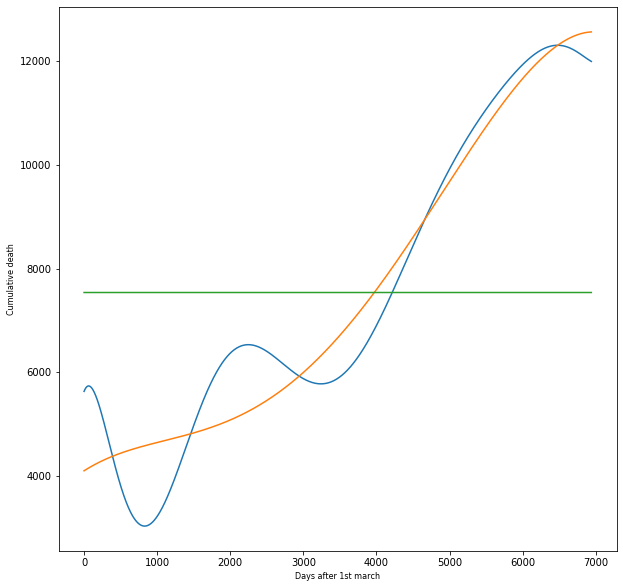

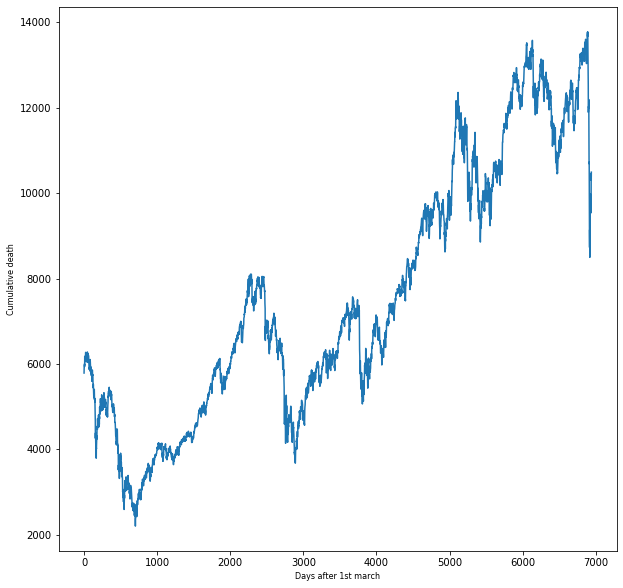

In [8]:
def p_regression(dep_var):
    approximate_output_matrix = np.empty(0)
    dep_var = dep_var[::-1]
    i=0;
    while i<len(data):
        j=0
        result = 0
        while j<len(dep_var):
            result = result+(dep_var[j]*(i**j))
            j += 1
        approximate_output_matrix = np.append(approximate_output_matrix,[result],axis=0)
        i += 1
    return approximate_output_matrix

pr3 = p_regression(xp3)
pr2 = p_regression(xp2)
pr1 = p_regression(xp1)



fig = plt.figure(figsize = (10,10))
plt.plot(pr3)
plt.plot(pr2)
plt.plot(pr1)
plt.xlabel('Days after 1st march',fontsize=8)
plt.ylabel('Cumulative death',fontsize=8)
plt.show()

fig = plt.figure(figsize = (10,10))
plt.plot(data)
plt.xlabel('Days after 1st march',fontsize=8)
plt.ylabel('Cumulative death',fontsize=8)
plt.show()



Shape of A (6940, 10) Shape of U (6940, 6940) Shape of S (10,) Shape of V (10, 10) Shape of z_hat (6940,)
[7.13248474e+35 6.03660015e+30 1.22567861e+26 4.60758396e+21
 2.96125520e+17 3.21655853e+13 6.13172456e+09 2.26522659e+06
 2.02281442e+03 8.30016094e+00]
[-1.05693037e-27  4.19749967e-23  6.85622054e-19  6.03387256e-15
  3.16218222e-11  1.00827542e-07  1.79121090e-04  1.30541724e-01
  3.54287953e+00  5.63304810e+03]


<Figure size 720x720 with 0 Axes>

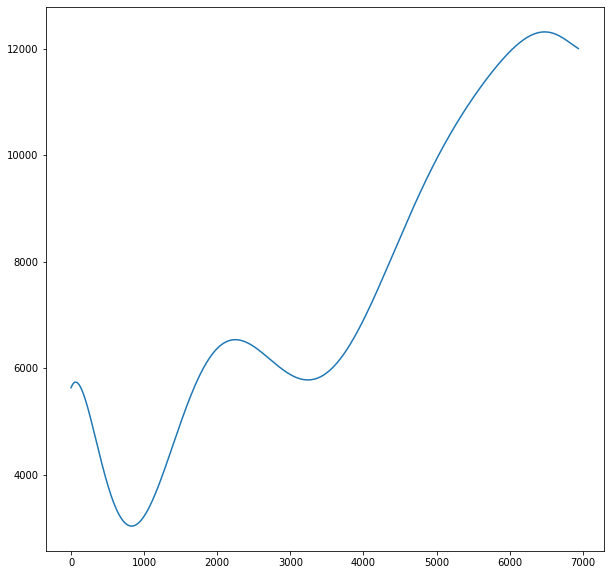

In [16]:
#SVD
A = create_polynomial_data_matrix(5)
U,S,Vt = np.linalg.svd(A, full_matrices=True)

z_hat = np.dot(U.transpose(),data)

def compute_xHat():
    xHat = np.empty(0,dtype='float')
    i = 0
    while i<len(S):
        xiHat = z_hat[i]/S[i]
        xHat = np.append(xHat,np.array([xiHat]),axis=0)
        i += 1
    return xHat

xHat = compute_xHat()

fig = plt.figure(figsize = (10,10))
x_min = p_regression(Vt.transpose()@xHat)
fig = plt.figure(figsize = (10,10))
plt.plot(x_min)

# plt.xlabel('Days ',fontsize=8)
# plt.ylabel('Dax',fontsize=8)
plt.show()

In [13]:
# z = np.polyfit(data, (np.arange(0,len(data),1)), 9)
# pr3 = p_regression(z[::-1])



# fig = plt.figure(figsize = (10,10))
# plt.plot(pr3)

# plt.xlabel('Days after 1st march',fontsize=8)
# plt.ylabel('Cumulative death',fontsize=8)
# plt.show()